In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
from scipy import stats
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

##### Датасет с исследовнием языковых способностей у условно норматипичных детей (typical development - TD) и детей со "специфическим языковым нарушением"(specific language impairment - SLI) у детей от 4 до 15.9 лет.

Специфические языковые нарушения - это состояние, которым страдают примерно 7% 5-летних детей. Нарушение характеризуется отсутствием языковых навыков по сравнению с норматипичными сверстниками, но без явных психических или физических недостатков. Автоматизация процесса диагностики с использованием методов НЛП и машинного обучения может быть интересна педиатрам и логопедам.

В этом исследовании оценивались три набора данных, полученных в рамках проекта CHILDES. 
Все наборы данных состоят из составления рассказов по серии сюжетных картин.
В данном исследвании выбран метод повествовательных корпусов (набор заданий по составлению рассказов с опорой на наглядный материал (картинки)), так как предыдущие исследования показали его эффективность для выявления языковых нарушений у детей. 

Первый набор данных состоит из выборок британских подростков, 
второй - канадских детей в возрасте от 4 до 9 лет, 
а третий - американских детей в возрасте от 4 до 12 лет.

###### Conti-Ramsden 4 - корпус (набор данных):

Собран для исследования оценки эффективности тестов на составления рассказов на подростках. Включает 99 выборок норматипичных детей (TD) и 19 выборк детеей с языковым нарушением (SLI) в возрасте от 13.1 до 15.9 лет. 

Корпус содержит стенограммы рассказа истории, с опорой на книжку с картинками (без текста) Майера «Лягушка, где ты». Дети сначала просматривали книжку с картинками некоторе время, затем им было предложено пересказать историю в прошедшем времени. и.

###### ENNI

Набор данных состоит из 300 выборок TD и 77 выборок SLI детей в возрасте от 4 до 9 лет. Каждому ребенку были представлены две серии сюжетных картин, одна - простая, вторая - повышенного уровня сложности. В отличие от Conti4 экзаменатор держал книгу и переворачивал страницу после того, как ребенок заканчивал  описывать определенную картинку. 

###### Gillam

Набор данных Gillam основан на «The Test of Narrative Language"(TNL). Он состоит из 250 выборок детей с языковыми нарушениями и 520 выборок детей из контрольной группы в возрасте от 5 до 12 лет. TNL состоит из четырех заданий по составлению рассказа, первое - перессказ прослушанного текста с опорными вопросами, а остальные - рассказ по серии сюжетных кратинок. 

#### Характеристики
Все характеристики датасета можно найти в файле https://github.com/chernova-ann/theory-of-probability/blob/main/project_pt/specifications.txt

Здесь перечисленны те, которые использованны в исследовании.

1.filename - имя файла, с записанным ответом ребенка

2. sex - пол

3. age - возраст

4. corpus - набор заданий (ENNY, Gillam, Conti4)

5. group - SLI (дети со специфическим расстройством языка), TD (условно нормально развивающиеся сверстники)


#### Решаемые задачи:

Возраст привести к реальным числовым значениям, категориальные данные заменить на числовые значения, изменить тип данных.

1.Проверить распределение total_errors на нормальность в каждой группе

2.Проверить гипотезу о том, что мат ожидание total_errors одинаковое во всех группах

3.Проанализировать влияние возраста на SLI в одной из групп

4.Проверить есть ли корреляция между полом и нарушением речи


#### Чтение и подготовка данных

In [2]:
data_df = pd.read_csv('SLD.csv')
print("Data is loaded!")

Data is loaded!


In [3]:
data_df.head(5)

,filename,sex,age,corpus,group,child_TNW,child_TNS,examiner_TNW,freq_ttr,r_2_i_verbs,...,word_errors,f_k,n_v,n_aux,n_3s_v,det_n_pl,det_pl_n,pro_aux,pro_3s_v,total_error
0,fssli009.cha,NaN,165,Conti4,SLI,287,36,4,0.333,0.108108,...,8,1.210456,0,2,2,7,0,0,1,12
1,fssli058.cha,NaN,172,Conti4,SLI,368,42,27,0.274,0.050000,...,16,1.871708,0,4,0,5,0,0,0,9
2,fssli062.cha,NaN,160,Conti4,SLI,266,26,2,0.411,0.105263,...,0,2.240602,0,1,0,5,0,0,0,6
3,fssli066.cha,NaN,184,Conti4,SLI,405,40,21,0.359,0.148936,...,4,1.877762,1,0,0,11,0,0,0,12
4,fssli108.cha,NaN,176,Conti4,SLI,300,35,20,0.279,0.150000,...,8,0.339524,0,1,1,5,0,0,0,7


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   filename               1163 non-null   object 
 1   sex                    1044 non-null   object 
 2   age                    1163 non-null   int64  
 3   corpus                 1163 non-null   object 
 4   group                  1163 non-null   object 
 5   child_TNW              1163 non-null   int64  
 6   child_TNS              1163 non-null   int64  
 7   examiner_TNW           1163 non-null   int64  
 8   freq_ttr               1163 non-null   float64
 9   r_2_i_verbs            1163 non-null   float64
 10  num_pos_tags           1163 non-null   int64  
 11  n_dos                  1163 non-null   int64  
 12  repetition             1163 non-null   int64  
 13  retracing              1163 non-null   int64  
 14  fillers                1163 non-null   int64  
 15  s_1g

In [5]:
data_df['age'] = data_df['age'].astype(float) # Возраст перводим в число с плавающей точкой, так как дети были разного вораста от 4 до 14.3 лет.

In [6]:
data_df['age'] = data_df['age']/10 # Делим трехзначные числа возраста на 10, чтобы получить реальный возраст испытуемых.

In [7]:
#Количество выборок по каждому набору заданий.
data_df.loc[data_df['corpus'] == 'ENNI', :] # ENNI =  #377 rows GILLAM = #668 rows Conti4 = #118 rows

,filename,sex,age,corpus,group,child_TNW,child_TNS,examiner_TNW,freq_ttr,r_2_i_verbs,...,word_errors,f_k,n_v,n_aux,n_3s_v,det_n_pl,det_pl_n,pro_aux,pro_3s_v,total_error
118,413.cha,male,5.9,ENNI,SLI,212,66,14,0.412,5.142857,...,0,-0.533499,0,0,0,5,0,0,0,5
119,420.cha,male,6.0,ENNI,SLI,468,67,2,0.239,1.366667,...,1,0.875632,14,7,0,4,0,0,0,25
120,427.cha,female,5.6,ENNI,SLI,212,67,8,0.369,0.600000,...,0,-1.387102,0,4,0,4,0,0,0,8
121,444.cha,male,5.0,ENNI,SLI,292,90,20,0.232,0.600000,...,0,3.294511,0,1,0,17,0,0,0,18
122,474.cha,female,5.7,ENNI,SLI,611,100,202,0.230,1.000000,...,0,-2.855545,4,0,1,6,0,0,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,969.cha,female,11.2,ENNI,TD,663,70,0,0.251,0.195122,...,0,2.288774,1,0,0,9,0,0,3,13
491,970.cha,male,11.5,ENNI,TD,784,69,0,0.266,0.149533,...,0,4.193345,2,1,0,3,0,0,5,11
492,971.cha,female,11.1,ENNI,TD,452,52,0,0.338,0.264706,...,0,3.750885,2,5,0,7,0,0,3,17
493,972.cha,male,11.4,ENNI,TD,591,64,0,0.274,0.181818,...,0,1.748124,0,2,8,10,0,0,3,23


Приводим категориальные данные в цифровой вид, чтобы было можно посчитать статистику в зависимости от категории.

sex: male = 1 female = 0
 
group:  SLI = 1 TD = 0


In [8]:
data_df.loc[data_df['sex'] == 'male', 'sex']=1 
data_df.loc[data_df['sex'] == 'female', 'sex']=0 

In [44]:
#Приведение типов ячеек к int.
data_df['sex'] = data_df['sex'].astype(float)
data_df['group'] = data_df['group'].astype(float)

In [9]:
data_df.loc[data_df['sex'] == 1]

,filename,sex,age,corpus,group,child_TNW,child_TNS,examiner_TNW,freq_ttr,r_2_i_verbs,...,word_errors,f_k,n_v,n_aux,n_3s_v,det_n_pl,det_pl_n,pro_aux,pro_3s_v,total_error
118,413.cha,1,5.9,ENNI,SLI,212,66,14,0.412,5.142857,...,0,-0.533499,0,0,0,5,0,0,0,5
119,420.cha,1,6.0,ENNI,SLI,468,67,2,0.239,1.366667,...,1,0.875632,14,7,0,4,0,0,0,25
121,444.cha,1,5.0,ENNI,SLI,292,90,20,0.232,0.600000,...,0,3.294511,0,1,0,17,0,0,0,18
123,475.cha,1,5.6,ENNI,SLI,321,64,20,0.257,0.105263,...,0,-2.973470,1,0,0,4,0,0,1,6
124,476.cha,1,5.7,ENNI,SLI,658,97,315,0.197,0.272727,...,1,0.702679,4,2,0,5,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,9y54974ks.cha,1,10.8,Gillam,TD,219,25,0,0.453,0.250000,...,0,2.051058,0,0,0,2,0,0,2,4
1157,9y54975ks.cha,1,10.9,Gillam,TD,364,40,1,0.480,0.326531,...,0,3.681527,2,0,0,10,0,0,2,14
1160,9y54979ks.cha,1,11.9,Gillam,TD,337,29,18,0.409,0.315789,...,0,3.123078,0,0,0,5,0,0,4,9
1161,9y54984ks.cha,1,11.2,Gillam,TD,511,45,4,0.382,0.381818,...,0,3.548256,1,0,0,9,0,0,5,15


In [10]:
data_df.loc[data_df['group'] == 'SLI', 'group']=1 
data_df.loc[data_df['group'] == 'TD', 'group']=0 

In [11]:
data_df.loc[data_df['group'] == 1]

,filename,sex,age,corpus,group,child_TNW,child_TNS,examiner_TNW,freq_ttr,r_2_i_verbs,...,word_errors,f_k,n_v,n_aux,n_3s_v,det_n_pl,det_pl_n,pro_aux,pro_3s_v,total_error
0,fssli009.cha,NaN,16.5,Conti4,1,287,36,4,0.333,0.108108,...,8,1.210456,0,2,2,7,0,0,1,12
1,fssli058.cha,NaN,17.2,Conti4,1,368,42,27,0.274,0.050000,...,16,1.871708,0,4,0,5,0,0,0,9
2,fssli062.cha,NaN,16.0,Conti4,1,266,26,2,0.411,0.105263,...,0,2.240602,0,1,0,5,0,0,0,6
3,fssli066.cha,NaN,18.4,Conti4,1,405,40,21,0.359,0.148936,...,4,1.877762,1,0,0,11,0,0,0,12
4,fssli108.cha,NaN,17.6,Conti4,1,300,35,20,0.279,0.150000,...,8,0.339524,0,1,1,5,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,a-3-69.cha,1,9.3,Gillam,1,181,23,8,0.506,0.375000,...,4,1.560898,0,0,0,2,0,0,0,2
662,a-3-70.cha,0,9.3,Gillam,1,443,42,0,0.461,0.325581,...,0,2.161495,0,0,0,4,0,0,0,4
663,a-3-72.cha,1,8.6,Gillam,1,230,30,41,0.468,0.800000,...,1,0.123478,0,1,1,2,0,0,0,4
664,a-3-73.cha,1,10.0,Gillam,1,158,20,40,0.488,1.000000,...,3,-0.111532,1,1,0,2,0,0,4,8


##### 1. Нормальное распределение

Проверить распределение total_error на нормальность в каждой группе

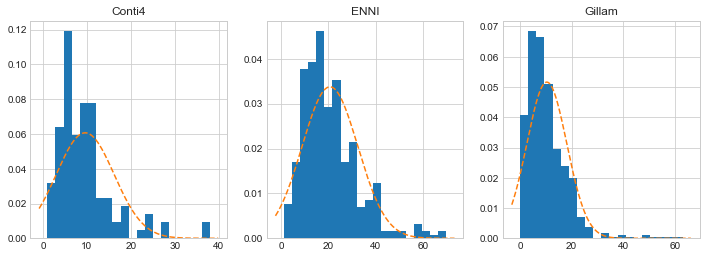

In [12]:
keys = list(data_df.corpus.unique())

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(4 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(data_df.loc[(data_df['corpus'] == key) , 'total_error'], density=True, bins=20)
    
    loc = data_df.loc[(data_df['corpus'] == key) , 'total_error'].mean()
    scale = data_df.loc[(data_df['corpus'] == key) , 'total_error'].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

Из графиков видно, что распределение отлично от нормального. ПРоверим это с помощью QQ-plot. 

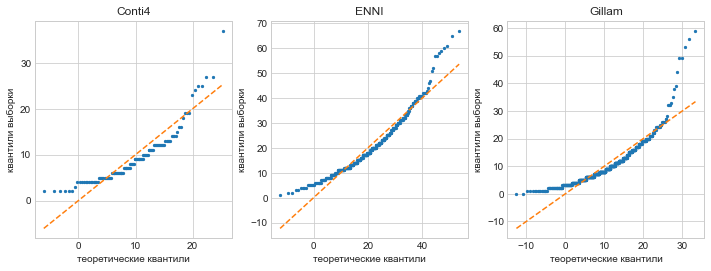

In [13]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(4 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = data_df.loc[(data_df['corpus'] == key) , 'total_error']
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

Распределение не нормальное.

##### 2. Проверить гипотезу о том, что мат ожидание total_errors одинаковое во всех группах

In [14]:
keys

['Conti4', 'ENNI', 'Gillam']

In [16]:
c4 = np.array(data_df.loc[(data_df['corpus'] == 'Conti4') , 'total_error'])
en = np.array(data_df.loc[(data_df['corpus'] == 'ENNI') , 'total_error'])
gil = np.array(data_df.loc[(data_df['corpus'] == 'Gillam') , 'total_error'])

In [17]:
c4_len = len(c4)
en_len = len(en)
gil_len = len(gil)

c4_len, en_len, gil_len

(118, 377, 668)

In [18]:
c4_mean = c4.mean()
en_mean = en.mean()
gil_mean = gil.mean()

c4_mean, en_mean, gil_mean

(9.610169491525424, 20.641909814323608, 10.401197604790418)

In [19]:
corpus = np.concatenate([c4, en, gil])
corpus_mean = corpus.mean()
corpus_mean

13.640584694754944

In [20]:
SS_b = c4_len * (c4_mean - corpus_mean) ** 2 + en_len * (en_mean - corpus_mean) ** 2 + gil_len * (gil_mean - corpus_mean) ** 2

SS_w = ((c4 - c4_mean) ** 2).sum() + ((en - en_mean) ** 2).sum() + ((gil - gil_mean) ** 2).sum()

SS_b, SS_w

(27406.559738947544, 97473.20466346003)

In [21]:
k = 3
n = len(corpus)

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(13703.279869473772, 84.02862470987934)

In [22]:
F = sigma2_b / sigma2_w
F

163.07871176978412

In [23]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.003482172639214

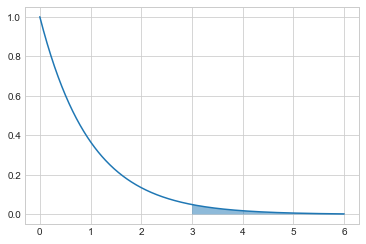

In [24]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

In [25]:
F>t

True

F-статистика попадает в критическую область, значит, гипотеза отвергается. Мат.ожидание  total_error разное во всех группах.

##### 3.Проанализировать проявление SLI  взависимости от возраста в группе по одному набору заданий (Gillam)

In [27]:
list(data_df.group.unique()) # 1 - SLI, 0 -TD

[1, 0]

In [31]:
sli = np.array(data_df.loc[(data_df['group'] == 1) & (data_df['corpus']=='Gillam')  , 'age'])
td = np.array(data_df.loc[(data_df['group'] == 0) & (data_df['corpus']=='Gillam') , 'age'])

len(td), len(sli)

(497, 171)

In [32]:
sli_mean = sli.mean()
td_mean = td.mean()

sli_mean, td_mean

(9.651461988304094, 9.79758551307847)

In [33]:
groups = np.concatenate([sli, td])
groups_mean = groups.mean()
groups_mean

9.760179640718563

In [34]:
SS_b = len(sli) * (sli_mean - groups_mean) ** 2 + len(td) * (td_mean - groups_mean) ** 2 

SS_w = ((sli - sli_mean) ** 2).sum() + ((td - td_mean) ** 2).sum()

SS_b, SS_w

(2.7165413244955907, 2799.3642371186183)

In [35]:
k = 2
n = len(groups)

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(2.7165413244955907, 4.203249605283211)

In [36]:
F = sigma2_b / sigma2_w
F

0.6462955045736697

In [37]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8554591927196853

In [38]:
F>t

False

Итак, критическая область:
$$\Omega_\alpha = (3.855, \infty)$$
Значение статистики не попало в критическую область. Значит возраст не имеет статистическую значимость при выявлении специфического языкового нарушения (SLI).

#### 4.Проверить есть ли корреляция между полом и нарушением речи

В датасете есть выборки , в которых осутствует значение пола, исключим их из сравниваемых выборок.

In [52]:
sex = np.array(data_df.loc[(data_df['sex'] == 1) | (data_df['sex']== 0), 'sex'])
group = np.array(data_df.loc[(data_df['sex'] == 1) | (data_df['sex']== 0), 'group'])

In [53]:
np.corrcoef(sex, group)[0][1]

0.09023483264291995

In [57]:
len(sex)==len(group)

1044

In [58]:
def statistic(x: np.ndarray, y: np.ndarray) -> float:
    if len(x) == len(y):
        cov = ((x - x.mean()) * (y - y.mean())).sum() / (len(x) - 1)
        corr = cov / (x.std(ddof = 1) * y.std(ddof = 1))
        return (corr * (len(x) - 2) ** 0.5 / (1 - corr ** 2) ** 0.5)

In [59]:
t = statistic(sex, group)
t

2.9247139566491405

In [60]:
alpha = 0.05
n = len(sex)

t1 = stats.t.ppf(alpha / 2, df = n - 2)
t2 = stats.t.ppf(1 - alpha / 2, df = n - 2)

t1, t2

(-1.9622432382037247, 1.9622432382037243)

In [61]:
t1 < t < t2

False

Итак, критическая область:
$$\Omega_\alpha = (-\infty, -1.96) \cup (1.96, \infty)$$
Значение статистики попало в критическую область, значит нулевую гипотезу отвергаем. Влияние пола статистически не значимо для выявления нарушений речи.